In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("ratings_Electronics.csv")

- first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

extract the following fields: 'product/productId' as prod_id, 'product/title' as prod_name, 'review/userId' as user id, 'review/score' as rating

In [5]:
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [6]:
df.shape

(7824481, 4)

In [7]:
df1=df.drop("1365811200",axis=1)

In [8]:
df.columns

Index(['AKM1MP6P0OYPR', '0132793040', '5.0', '1365811200'], dtype='object')

In [9]:
df1=df1.rename(columns={'AKM1MP6P0OYPR':'user_id','0132793040':'prod_id','5.0':'rating'})

In [10]:
df1.head()

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [20]:
df1.shape

(7824481, 3)

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
user_id    object
prod_id    object
rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [23]:
df1['user_id'].unique().shape

(4201696,)

In [11]:
df_new=df1.groupby('user_id').count()

In [12]:
df_new.shape

(4201696, 2)

In [13]:
df_less=df_new.loc[df_new['rating']<50]#selecting the users whose rating less than 50

In [14]:
df1=df1.set_index('user_id')

In [16]:
df_dense.shape

(125871, 2)

In [17]:
df_dense.groupby('user_id')['rating'].count().sort_values(ascending=False)# these are the users who gave ratings above 50

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
                 ... 
A1USYP4AXF5I1D     50
A17RFKCYS69M3Y     50
A3SP7T2PZ3HSDE     50
A21S26XYPGXJZX     50
A3EP26M3QHINXT     50
AOTZOHB2LZGYR      50
A2WDCAMKCCP1UR     50
A3HC7NWLKCPX4X     50
A7Z2J9V37ABCO      50
A1VJ0V58N0698J     50
A2FZQF0MH29VYN     50
A3QD59N3M7O7KB     50
A3LSEIG2PIJYBL     50
A2QIC4G483SQQA     50
A2

In [18]:
uid=df_dense.index  # extracting index in to other data frame

In [19]:
df_dense['user_id']=uid  # making user_id as column

C:\Users\darsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_dense.columns

Index(['prod_id', 'rating', 'user_id'], dtype='object')

In [22]:
df_dense.index=range(1,len(df_dense)+1)

In [23]:
df_dense.head(2)

,prod_id,rating,user_id
1,0594451647,5.0,A3BY5KCNQZXV5U
2,0594481813,3.0,AT09WGFUM934H


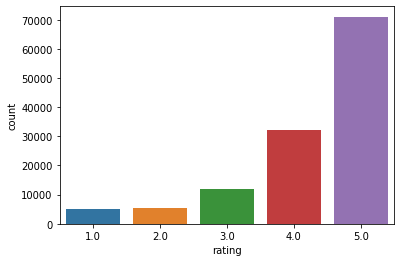

In [103]:
sns.countplot(x='rating',data=df_dense)  # the count of rating 5 has more when compared by others....

In [24]:
users=df_dense['user_id']

In [25]:
train_data, test_data = train_test_split(df_dense, test_size = 0.20, random_state=0)
print(train_data.head(5))

          prod_id  rating         user_id
17565  B000FAKUE6     5.0  A3IOQ7NVVLAUEE
25833  B000UY3NR8     3.0  A141OPVE376YFI
14933  B000BI655U     3.0   AGX2K0FMS0IVL
86208  B0064PKG3Q     4.0   AX05DBU8IRUWY
52011  B002XJSB9S     4.0    ADLVFFE4VBT8


In [3]:
import Recommender as Recommenders

In [93]:
pm=Recommenders.popularity_recommender_py()

In [94]:
pm.create(train_data,'user_id','prod_id')

In [95]:
pm.recommend(users[47])

,user_id,prod_id,score,Rank
33726,A328GLDSDNFYII,B0088CJT4U,160,1.0
21503,A328GLDSDNFYII,B003ES5ZUU,146,2.0
33101,A328GLDSDNFYII,B007WTAJTO,134,3.0
9568,A328GLDSDNFYII,B000N99BBC,128,4.0
33402,A328GLDSDNFYII,B00829TIEK,118,5.0
34011,A328GLDSDNFYII,B008DWCRQW,113,6.0
33398,A328GLDSDNFYII,B00829THK0,104,7.0
19040,A328GLDSDNFYII,B002R5AM7C,103,8.0
19238,A328GLDSDNFYII,B002SZEOLG,95,9.0
24884,A328GLDSDNFYII,B004CLYEDC,95,10.0


# colaborative filtering


In [31]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy


In [32]:
reader=Reader(rating_scale=(1,5))

In [33]:
cols = list(df_dense.columns)
cols = [cols[-1]] + cols[:-1]
df = df_dense[cols]

In [34]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column . 
df['user_id']= label_encoder.fit_transform(df['user_id']) 
df['prod_id']=label_encoder.fit_transform(df['prod_id'])
print(df['prod_id'].unique().shape)  
df['user_id'].unique().shape

(48190,)


(1540,)

In [35]:
df['user_id']=df['user_id'].astype('int64')
df['prod_id']=df['prod_id'].astype('object')
df['rating']=df['rating'].astype('int64')


In [36]:
df.dtypes

user_id     int64
prod_id    object
rating      int64
dtype: object

In [38]:
df.shape

(125871, 3)

In [37]:
data=Dataset.load_from_df(df[['user_id','prod_id','rating']],reader)

In [39]:
data

In [40]:
trainset,testset=train_test_split(data,test_size=0.15)

In [41]:
algo=SVD()

In [42]:
algo.fit(trainset)

In [57]:
cross_validate(algo, data, measures=['RMSE', 'MSE','MAE'], cv=5, verbose=True)

Evaluating RMSE, MSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9889  0.9866  0.9897  0.9788  0.9718  0.9831  0.0069  
MSE (testset)     0.9779  0.9733  0.9795  0.9580  0.9443  0.9666  0.0135  
MAE (testset)     0.7326  0.7279  0.7297  0.7229  0.7204  0.7267  0.0044  
Fit time          13.51   13.58   13.71   13.25   13.49   13.51   0.15    
Test time         0.33    0.45    0.34    0.36    0.46    0.39    0.06    


{'test_rmse': array([0.98887963, 0.98655804, 0.98969166, 0.97877155, 0.97176524]),
 'test_mse': array([0.97788292, 0.97329677, 0.97948959, 0.95799375, 0.94432767]),
 'test_mae': array([0.73256715, 0.72789675, 0.7297208 , 0.72290296, 0.72043666]),
 'fit_time': (13.512774467468262,
  13.575242757797241,
  13.71078872680664,
  13.252620697021484,
  13.490537643432617),
 'test_time': (0.3345456123352051,
  0.45497798919677734,
  0.3426496982574463,
  0.35622167587280273,
  0.4648120403289795)}

In [47]:
predictions=algo.test(testset)

In [60]:
predictions[:7]

[Prediction(uid=838, iid=35851, r_ui=1.0, est=3.5670333697694936, details={'was_impossible': False}),
 Prediction(uid=1220, iid=47265, r_ui=4.0, est=4.211065456961259, details={'was_impossible': False}),
 Prediction(uid=110, iid=3499, r_ui=5.0, est=4.446326788399968, details={'was_impossible': False}),
 Prediction(uid=705, iid=39003, r_ui=4.0, est=4.4632339398316745, details={'was_impossible': False}),
 Prediction(uid=1448, iid=34096, r_ui=4.0, est=3.886459123322632, details={'was_impossible': False}),
 Prediction(uid=3, iid=29729, r_ui=2.0, est=3.7648348019275453, details={'was_impossible': False}),
 Prediction(uid=1203, iid=3809, r_ui=5.0, est=4.157965348873657, details={'was_impossible': False})]

In [62]:
def get_Iu(uid):

    """ return the number of items rated by given user

    args: 

      uid: the id of the user

    returns: 

      the number of items rated by the user

    """

    try:

        return len(trainset.ur[trainset.to_inner_uid(uid)])

    except ValueError: # user was not part of the trainset

        return 0

    

def get_Ui(iid):

    """ return number of users that have rated given item

    args:

      iid: the raw id of the item

    returns:

      the number of users that have rated the item.

    """

    try: 

        return len(trainset.ir[trainset.to_inner_iid(iid)])

    except ValueError:

        return 0

In [63]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

df['Iu'] = df.uid.apply(get_Iu)

df['Ui'] = df.iid.apply(get_Ui)

df['err'] = abs(df.est - df.rui)

best_predictions = df.sort_values(by='err')[:10]

worst_predictions = df.sort_values(by='err')[-10:]

In [65]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
10144,970,36310,1.0,4.650951,{'was_impossible': False},46,0,3.650951
1292,852,43808,1.0,4.657354,{'was_impossible': False},61,1,3.657354
11632,1129,29316,1.0,4.664076,{'was_impossible': False},76,0,3.664076
11786,179,24860,1.0,4.680783,{'was_impossible': False},42,0,3.680783
15152,288,20604,1.0,4.683895,{'was_impossible': False},96,12,3.683895
17580,600,24309,1.0,4.699208,{'was_impossible': False},51,8,3.699208
746,1046,13897,1.0,4.735397,{'was_impossible': False},85,1,3.735397
5952,568,33901,1.0,4.761472,{'was_impossible': False},52,0,3.761472
8928,1482,32325,1.0,4.844670,{'was_impossible': False},46,1,3.844670
14505,463,47709,1.0,4.985989,{'was_impossible': False},97,7,3.985989


In [72]:
from collections import defaultdict

In [73]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [74]:
top_n = get_top_n(predictions, n=5)

In [75]:
top_n

defaultdict(list,
            {838: [(47415, 4.699524422586913),
              (1868, 4.652310119019595),
              (11441, 4.361527263687426),
              (29081, 4.288916183109175),
              (8097, 4.280544027702918)],
             1220: [(36466, 4.955461658570888),
              (37744, 4.823945246851484),
              (37143, 4.646273367437187),
              (23896, 4.599911475280873),
              (47042, 4.598506101153335)],
             110: [(28764, 4.906295233762337),
              (10126, 4.798905196187132),
              (8311, 4.631121412425225),
              (43526, 4.623421183149219),
              (11081, 4.5658003866423815)],
             705: [(28754, 4.8179177697274955),
              (2625, 4.626709657287643),
              (12292, 4.588496471014909),
              (24949, 4.571317541160043),
              (39338, 4.512915961472839)],
             1448: [(8066, 4.293475477242677),
              (25354, 3.958155434322088),
              (29071, 3.944276

# summarising insights

Popularity based Recommended system is best in case of cold start and grey sheep problem.. But collaborative based model  gives the best results in prediction and they works on the basis of users interest...
collaborative filtering doesn't works better in coldstart problem.Poularity based filtering is best suited in this situation.